# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Edbert
- **Email:** edbert1xie@gmail.com
- **ID Dicoding:** edbert_xW9q

## Menentukan Pertanyaan Bisnis

- Musim manakah yang memiliki jumlah rental terbesar dan terkecil untuk tahun 2011 dan 2012?
- Berapa jumlah rental berdasarkan jam pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuka file hour.csv dari folder data

In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melakukan Pengecekan pada tipe data dan mengecek apakah ada column yang memiliki missing value

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari hasil diatas, dapat disimpulkan bahwa:
- dteday harus dikonversi menjadi tipe data datetime
- variabel season, weekday, dan mnth harus dikonversi sesuai dengan representasi value
- variabel yr harus dikonversi kedalam tahun sesuai dengan dteday

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari Hasil di atas, tidak ada missing value dari dataset yang digunakan

In [7]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


Dari Hasil di atas, juga tidak terdapat value yang duplikasi

In [8]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dari Hasil diatas, variabel temp, atemp, hum dan windspeed telah dinormalisasi. Akan lebih mudah jika nilai dikembalikan seperti semula agar lebih mudah dimengerti

### Cleaning Data

Konversi dteday untuk menjadi data type datetime

In [9]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi value dari season untuk menjadi string berdasarkan nilai representasi yaitu 1 untuk Spring, 2 untuk Summer, 3 untuk Fall, dan 4 untuk Winter

In [10]:
season_mapping = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi mnth berdasarkan bulan dari dteday yang sudah dikonversi menjadi datetime

In [11]:
hour_df["mnth"] = hour_df["dteday"].dt.month_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi weekday menjadi nama hari berdasarkan dteday yang sudah dikonversi menjadi datetime

In [12]:
hour_df["weekday"] = hour_df["dteday"].dt.day_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi yr menjadi tahun berdasarkan dteday yang telah dikonversi menjadi datetime

In [13]:
hour_df["yr"] = hour_df["dteday"].dt.year
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi temp, atemp, hum, dan windspeed agar menampilkan nilai sebelum dinormalisasi

In [14]:
hour_df["temp"] = hour_df["temp"]*41
hour_df["atemp"] = hour_df["atemp"]*50
hour_df["hum"] = hour_df["hum"]*100
hour_df["windspeed"] = hour_df["windspeed"]*67

In [15]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


Mengkonversi weathersit menjadi string sesuai dengan nilai representasi nya yaitu 1 untuk Clear, 2 untuk Mist, 3 untuk Light Rain/Snow, dan 4 untuk Heavy Rain

In [16]:
weather_mapping = {1:"Clear", 2:"Mist", 3:"Light Rain/Snow", 4:"Heavy Rain"}
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)

In [17]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


Menyimpan data yang sudah dicleaning ke dalam file csv baru

In [18]:
hour_df.to_csv("dashboard/cleaned_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

Mengelompokan jumlah rental untuk setiap musim pada tahun 2011 dan 2012

In [19]:
hour_df.groupby(["season","yr"]).agg({
        "casual" : "sum",
        "registered" : "sum",
        "cnt" : "sum"
    })

casual  registered     cnt
season yr                              
Fall   2011   95450      324200  419650
       2012  130641      510838  641479
Spring 2011   21425      128575  150000
       2012   39197      282151  321348
Summer 2011   77564      269752  347316
       2012  125958      445315  571273
Winter 2011   52813      273324  326137
       2012   76969      438507  515476

Mengelompokan jumlah rental berdasarkan jam pada tahun 2011 dan 2012


In [20]:
hour_df.groupby(["hr","yr"]).agg({
        "casual" : "sum",
        "registered" : "sum",
        "cnt" : "sum"
    })

casual  registered     cnt
hr yr                              
0  2011    3423       12117   15540
   2012    3952       19638   23590
1  2011    2071        7487    9558
   2012    2638       11968   14606
2  2011    1570        5091    6661
   2012    1842        7849    9691
3  2011     954        2487    3441
   2012     939        3794    4733
4  2011     431        1386    1817
   2012     443        2168    2611
5  2011     428        4729    5157
   2012     584        8520    9104
6  2011    1377       19424   20801
   2012    1640       32691   34331
7  2011    3768       53162   56930
   2012    4269       92972   97241
8  2011    6969       88498   95467
   2012    8792      156742  165534
9  2011    8864       50622   59486
   2012   13594       86358   99952
10 2011   13065       34446   47511
   2012   20724       58022   78746
11 2011   16582       40016   56598
   2012   26704       68018   94722
12 2011   19006       50192   69198
   2012   30712       84504  115216
13 2011   20152       49187   69339
   2012   32561       83019  115580
14 2011   21097       45385   66482
   2012   33992       75178  109170
15 2011   20863       47727   68590
   2012   33743       80816  114559
16 2011   20739       64883   85622
   2012   33095      109031  142126
17 2011   21473      106159  127632
   2012   32747      176481  209228
18 2011   18066       98919  116985
   2012   26430      166357  192787
19 2011   14525       71277   85802
   2012   20980      120007  140987
20 2011   10960       51858   62818
   2012   15418       86314  101732
21 2011    8845       40030   48875
   2012   11725       64845   76570
22 2011    7031       30646   37677
   2012    9169       48766   57935
23 2011    4993       20123   25116
   2012    6072       32753   38825

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim manakah yang memiliki jumlah rental terbesar dan terkecil untuk tahun 2011 dan 2012?

Mengelompokan kembali jumlah rental berdasarkan musim dan menyimpan ke dalam variabel seasons_orders_df

In [21]:
seasons_orders_df = hour_df.groupby(["season","yr"]).agg({
        "casual" : "sum",
        "registered" : "sum",
        "cnt" : "sum"
    })
seasons_orders_df.head(10)

casual  registered     cnt
season yr                              
Fall   2011   95450      324200  419650
       2012  130641      510838  641479
Spring 2011   21425      128575  150000
       2012   39197      282151  321348
Summer 2011   77564      269752  347316
       2012  125958      445315  571273
Winter 2011   52813      273324  326137
       2012   76969      438507  515476

Menggunakan Visualisasi Data Clustered Bar Chart untuk membedakan data 2011 dan 2012

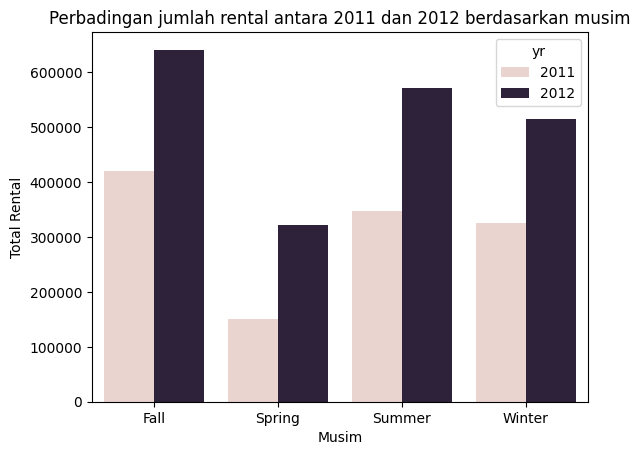

In [22]:
sns.barplot(data=seasons_orders_df,x="season",y="cnt", hue="yr", errorbar=None)
plt.title("Perbadingan jumlah rental antara 2011 dan 2012 berdasarkan musim")
plt.xlabel("Musim")
plt.ylabel("Total Rental")
plt.show()

### Pertanyaan 2: Berapa jumlah rental berdasarkan jam pada tahun 2011 dan 2012?

Mengelompokan kembali data jumlah rental berdasarkan jam dan menyimpan ke dalam variabel hours_orders_df

In [23]:
hours_orders_df = hour_df.groupby(["hr","yr"]).agg({
        "casual" : "sum",
        "registered" : "sum",
        "cnt" : "sum"
    })
hours_orders_df.head(30)

casual  registered     cnt
hr yr                              
0  2011    3423       12117   15540
   2012    3952       19638   23590
1  2011    2071        7487    9558
   2012    2638       11968   14606
2  2011    1570        5091    6661
   2012    1842        7849    9691
3  2011     954        2487    3441
   2012     939        3794    4733
4  2011     431        1386    1817
   2012     443        2168    2611
5  2011     428        4729    5157
   2012     584        8520    9104
6  2011    1377       19424   20801
   2012    1640       32691   34331
7  2011    3768       53162   56930
   2012    4269       92972   97241
8  2011    6969       88498   95467
   2012    8792      156742  165534
9  2011    8864       50622   59486
   2012   13594       86358   99952
10 2011   13065       34446   47511
   2012   20724       58022   78746
11 2011   16582       40016   56598
   2012   26704       68018   94722
12 2011   19006       50192   69198
   2012   30712       84504  115216
13 2011   20152       49187   69339
   2012   32561       83019  115580
14 2011   21097       45385   66482
   2012   33992       75178  109170

Menggunakan Visualisasi Data Clustered Bar Chart untuk membedakan data tahun 2011 dan 2012

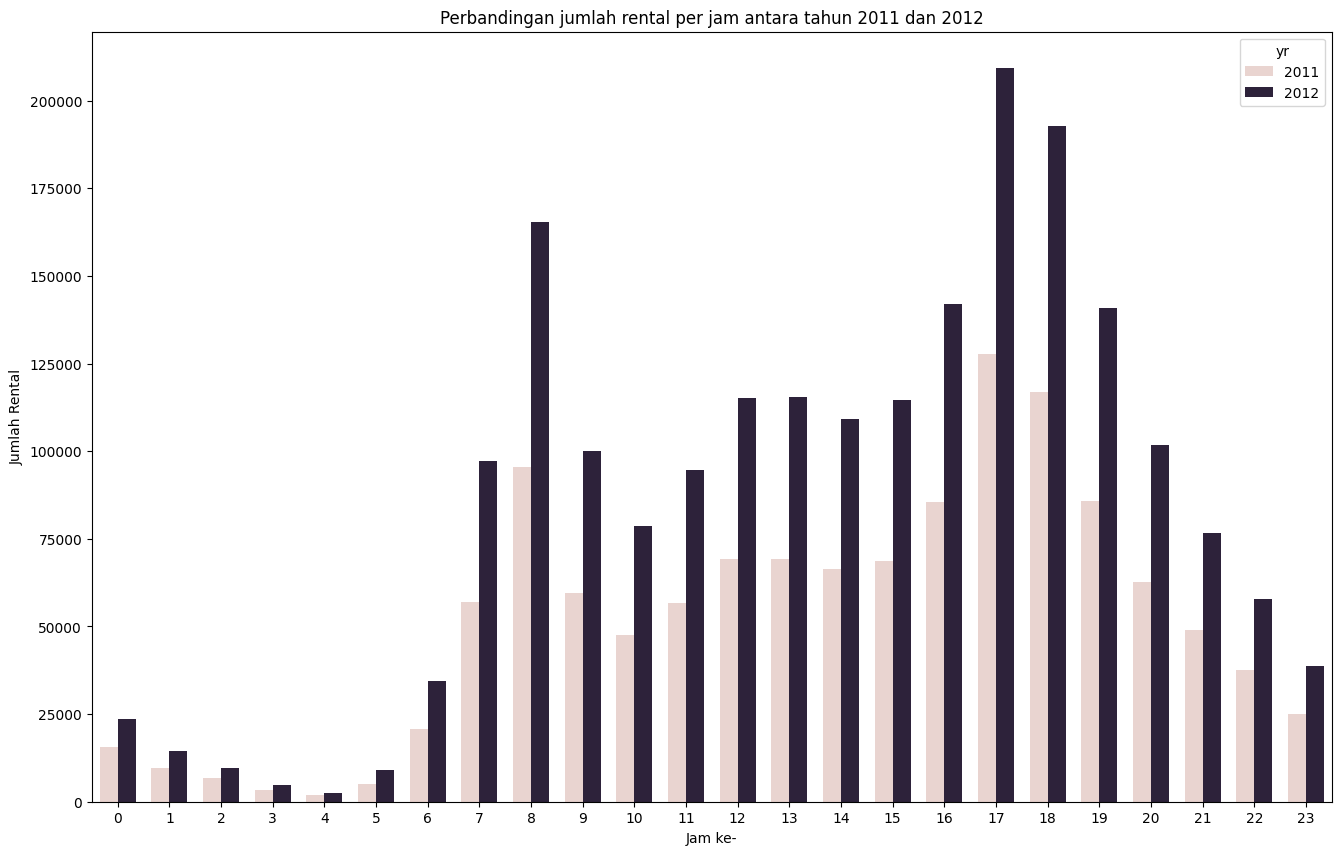

In [24]:
plt.figure(figsize=(16,10))
sns.barplot(data=hours_orders_df,x="hr",y="cnt", hue="yr",width = 0.7,errorbar=None)
plt.title("Perbandingan jumlah rental per jam antara tahun 2011 dan 2012")
plt.xlabel("Jam ke-")
plt.ylabel("Jumlah Rental")
plt.show()

## Conclusion

- Dari Clustered Bar Chart Musim, bisa disimpulkan bahwa pada masing-masing tahun, musim Fall merupakan musim yang memiliki jumlah rental terbesar di tahun 2011 dan 2012. Sedangkan, musim Spring merupakan musim yang memiliki jumlah rental terkecil di tahun 2011 dan 2012.
- Dari Clustered Bar Chart Per Jam, bisa disimpulkan bahwa pada tahun 2011 dan 2012, jam ke-17 merupakan jam yang memiliki jumlah rental terbesar dan jam ke-4 merupakan jam yang meiliki jumlah rental terkecil